# HW_1: Кластеризация (вариант II: нормализация с помощью StandardScaler)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import seaborn as sns
import matplotlib

#plt.rcParams["figure.figsize"] = [8, 8]

np.random.seed(10)

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score
from sklearn.metrics import get_scorer
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import os

from sklearn import metrics

from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", UserWarning)

In [2]:
data = pd.read_csv('german_credit_data.csv', index_col=0)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


### Избавляемся от пропущенных данных

In [3]:
data.dropna(inplace=True)

In [4]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [5]:
# Пропущеннных значений нет

### Препроцессинг

### Ordinary Encoder
Зададим функцию, которая кодирует категориальные признаки выбранным методом

In [6]:
def evaluate_encoding(data):
    # Здесь можно выполнить оценку качества кодирования
    # и возвратить результаты

    # Вернем пустой словарь для примера
    return {}

In [7]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']] = enc.fit_transform(data[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']])

In [8]:
data[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']].nunique()

Sex                 2
Housing             3
Saving accounts     4
Checking account    3
Purpose             8
dtype: int64

In [9]:
results = {}  # Определение переменной results

In [10]:
results['Ordinal_encoding'] = evaluate_encoding(data)

In [11]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0.0,2,1.0,0.0,1.0,5951,48,5.0
3,45,1.0,2,0.0,0.0,0.0,7882,42,4.0
4,53,1.0,2,0.0,0.0,0.0,4870,24,1.0
7,35,1.0,3,2.0,0.0,1.0,6948,36,1.0
9,28,1.0,3,1.0,0.0,1.0,5234,30,1.0


# Часть 4. Нормализация с помощью StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, index=data.index, columns=data.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,-1.094447,-1.451600,0.18254,-0.144578,-0.451116,0.557302,0.913171,2.139356,1.063306
3,0.858575,0.688895,0.18254,-1.899688,-0.451116,-0.957863,1.573037,1.657897,0.561456
4,1.537887,0.688895,0.18254,-1.899688,-0.451116,-0.957863,0.543768,0.213521,-0.944093
7,0.009435,0.688895,1.64848,1.610532,-0.451116,0.557302,1.253868,1.176438,-0.944093
9,-0.584963,0.688895,1.64848,-0.144578,-0.451116,0.557302,0.668155,0.694979,-0.944093


In [13]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,-1.094447,-1.451600,0.18254,-0.144578,-0.451116,0.557302,0.913171,2.139356,1.063306
3,0.858575,0.688895,0.18254,-1.899688,-0.451116,-0.957863,1.573037,1.657897,0.561456
4,1.537887,0.688895,0.18254,-1.899688,-0.451116,-0.957863,0.543768,0.213521,-0.944093
7,0.009435,0.688895,1.64848,1.610532,-0.451116,0.557302,1.253868,1.176438,-0.944093
9,-0.584963,0.688895,1.64848,-0.144578,-0.451116,0.557302,0.668155,0.694979,-0.944093


## 4.1. Снижение размерности для визуализации

### Метод t-SNE

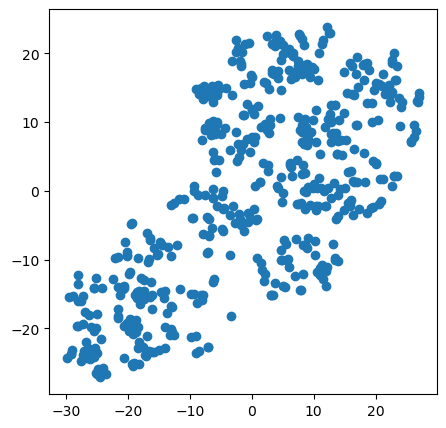

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10)
tsne_transformed = tsne.fit_transform(X_scaled)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1])
plt.show()

### Метод PCA для сжатия пространства до двух измерений

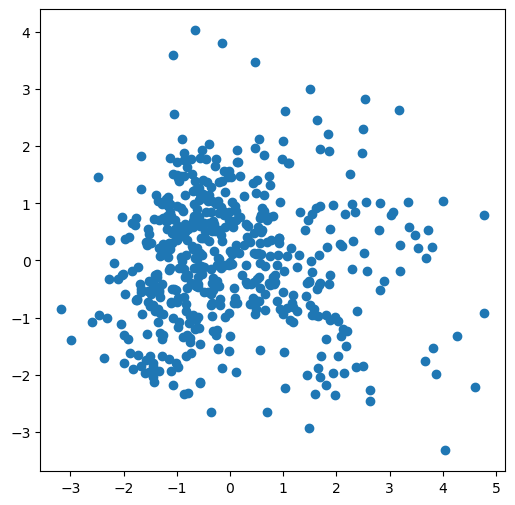

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1])
plt.show()

### Метод UMAP для сжатия пространства до двух измерений

In [16]:
# pip install umap-learn

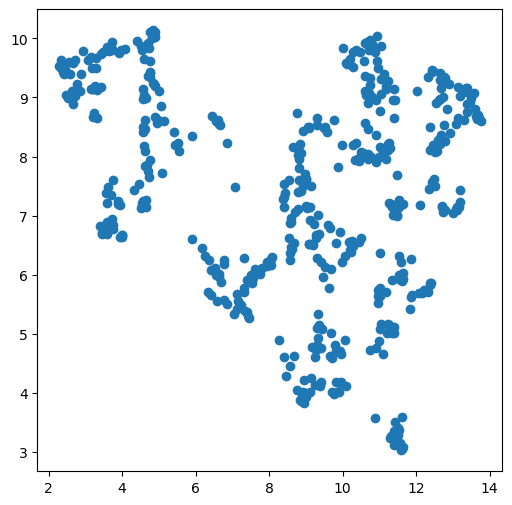

In [17]:
import umap
umap_transformed = umap.UMAP(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1])
plt.show()

### Выводы: Метод t-SNE и метод PCA не показали разделение на кластеры, метод UMAP показал кластеры, но они без четких границ:можно сказать и что их 2, и 3, и 9.

## 4.2. Построение трех вариантов кластеризации: k-means, hierarhical и DBSCAN, 
подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot;

## 4.2.1.k-means (I способ)

In [18]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=10).fit(data_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

Модели обучаем на полных данных, поэтому используем data_scaled

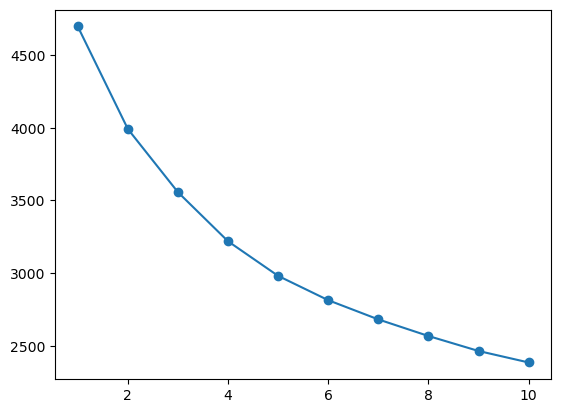

In [19]:
plt.plot(range(1,11), inertia, marker='o');

Метод локтя позволяет определить число кластеров. Но на данном графике нет четкого излома, Излом начинается с 2, но это может быть и 3,4,5,6. Для уточнения построим еще один график

In [20]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

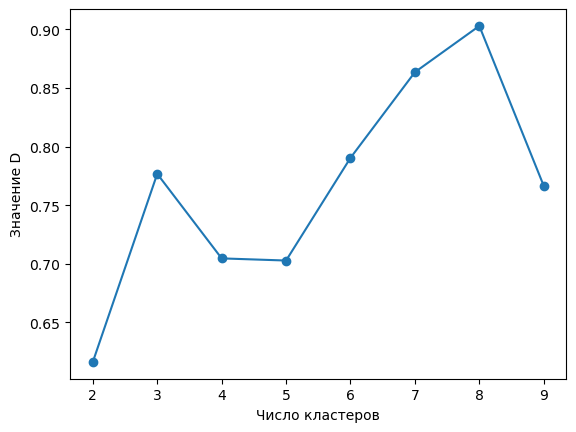

In [21]:
plt.plot(range(2,10), D, marker='o');
plt.xlabel("Число кластеров")
plt.ylabel("Значение D")
plt.show()

Чтобы определить оптимальное число кластеров, ищем точку, где значение D имеет самое минимальное значение. Значение 2 мы уже исследовали, можно выбрать точку 4 или 5. Я выбираю 4.

In [22]:
kmeans = KMeans(n_clusters=4, random_state=10, n_init=10).fit(data_scaled)
labels = kmeans.labels_

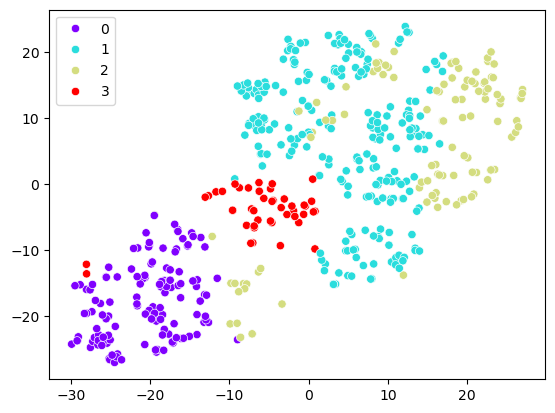

In [23]:
sns.scatterplot(x=tsne_transformed[:,0], y=tsne_transformed[:,1], hue=labels, palette='rainbow');

In [24]:
# Для анализа мне нужна матрица data_kmeans['Cluster'], поэтому я ее создам здесь.
data_kmeans = data.copy()
data_kmeans['Cluster'] = kmeans.labels_
data_kmeans.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
1,22,0.0,2,1.0,0.0,1.0,5951,48,5.0,2
3,45,1.0,2,0.0,0.0,0.0,7882,42,4.0,2
4,53,1.0,2,0.0,0.0,0.0,4870,24,1.0,2
7,35,1.0,3,2.0,0.0,1.0,6948,36,1.0,2
9,28,1.0,3,1.0,0.0,1.0,5234,30,1.0,2


In [25]:
data['labels'] = labels

In [26]:
data['labels'].value_counts(normalize=True).sort_index()

0    0.247126
1    0.454023
2    0.212644
3    0.086207
Name: labels, dtype: float64

"0 кластер " - 25%, "1 кластер " - 45%, "2 кластер " - 21%, "3 кластер " - 8%

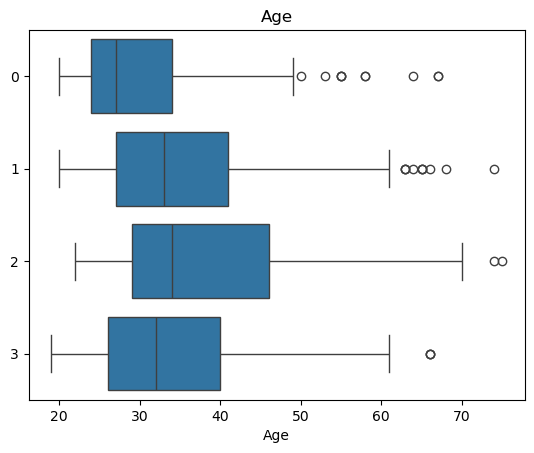

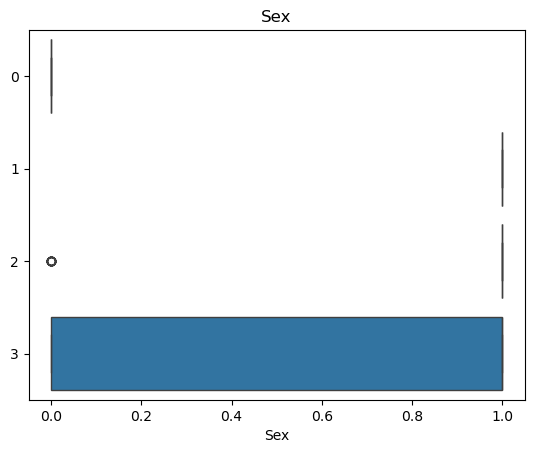

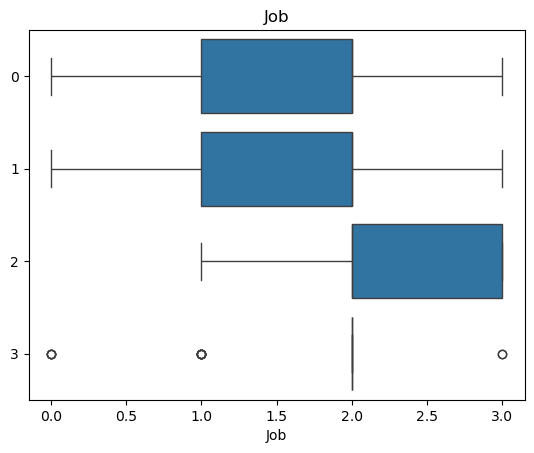

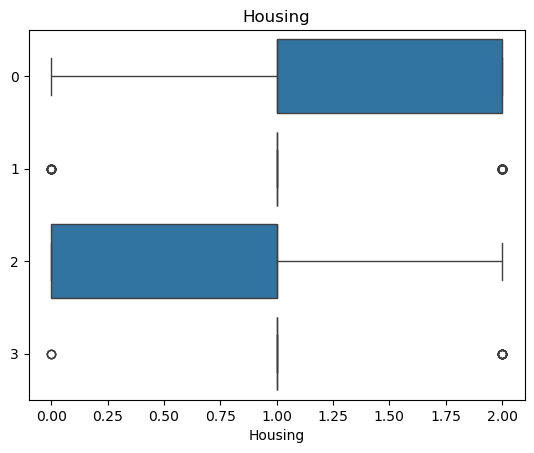

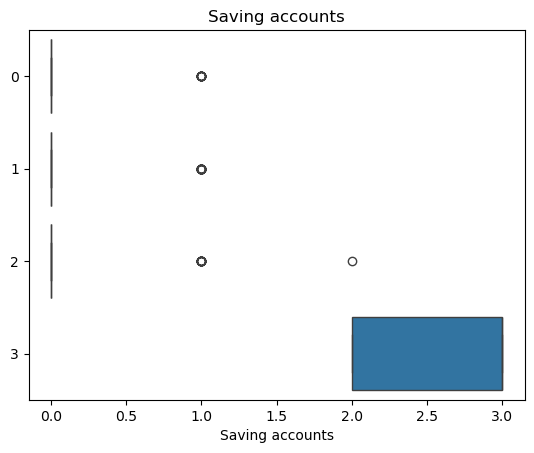

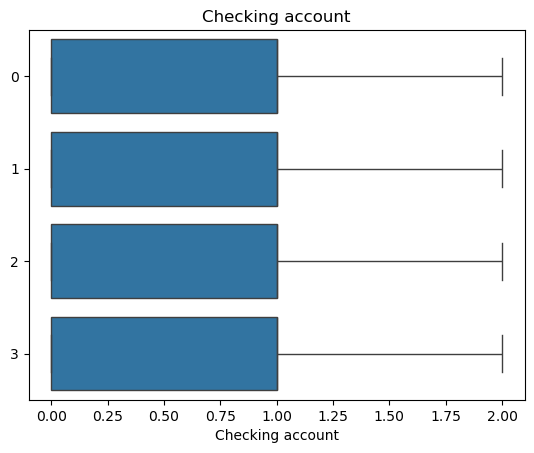

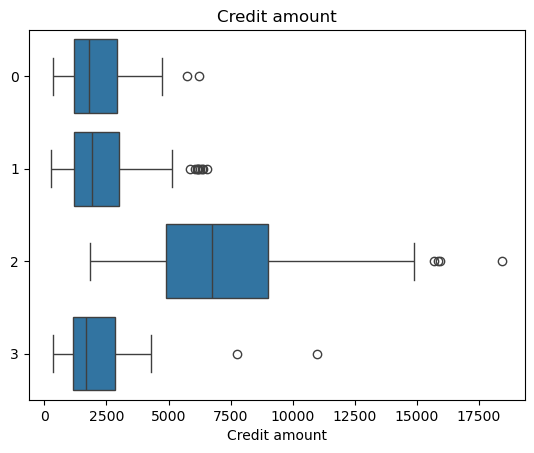

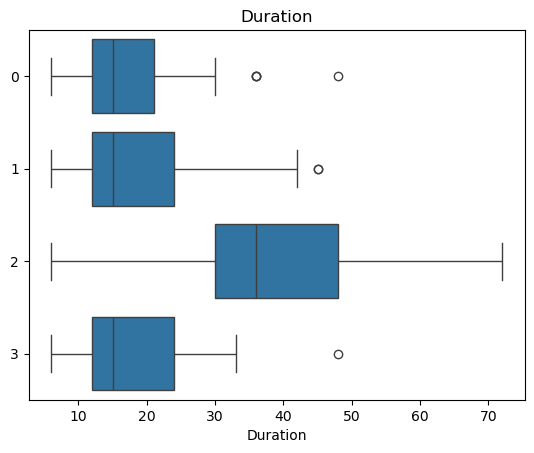

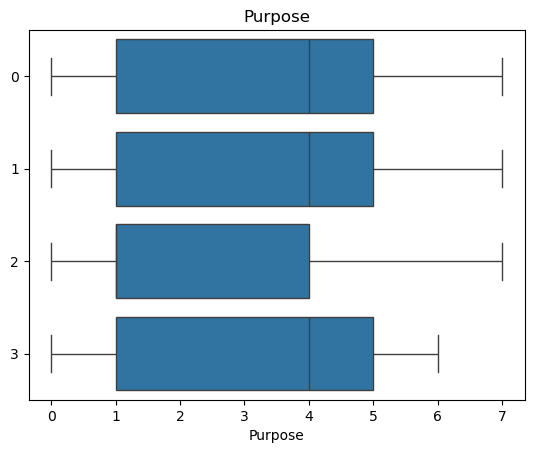

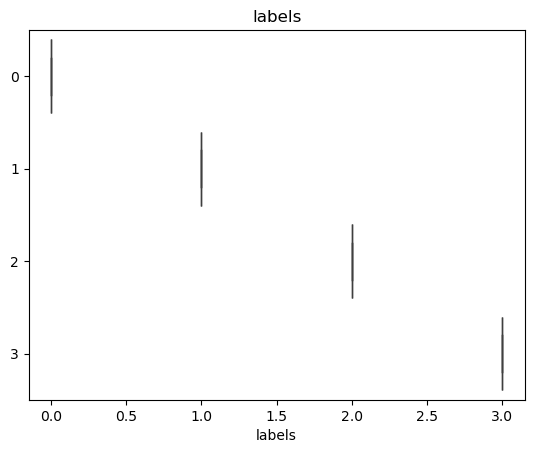

In [27]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [28]:
data.groupby('labels').median().T.round(2)

labels,0,1,2,3
Age,27.0,33.0,34.0,32.0
Sex,0.0,1.0,1.0,1.0
Job,2.0,2.0,2.0,2.0
Housing,1.0,1.0,1.0,1.0
Saving accounts,0.0,0.0,0.0,3.0
Checking account,1.0,1.0,1.0,1.0
Credit amount,1795.0,1935.0,6758.0,1680.0
Duration,15.0,15.0,36.0,15.0
Purpose,4.0,4.0,1.0,4.0


In [29]:
columns_of_interest = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in data.columns[0:9]:
    if col in columns_of_interest:
        print(col, np.unique(data[col]))

Sex [0. 1.]
Job [0 1 2 3]
Housing [0. 1. 2.]
Saving accounts [0. 1. 2. 3.]
Checking account [0. 1. 2.]
Purpose [0. 1. 2. 3. 4. 5. 6. 7.]


## 4.2.2.k-means (II способ) : автоматизированный поиск оптимального числа кластеров 

Best Num Clusters: 16


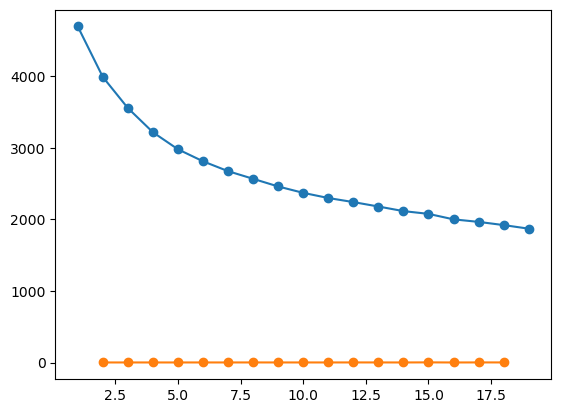

In [30]:
clusters = 20
inertia = []
for i in range(1,clusters):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=20).fit(data_scaled)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)
    
plt.plot(range(1,clusters), inertia, marker='o');

D = []
for i in range(1,clusters-2):
    Di = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
    D.append(Di)
    
D_series = pd.Series(data=D, index=list(range(2,len(inertia))))
print(f'Best Num Clusters: {D_series.index[D_series.argmin()]}')
plt.plot(D_series, marker='o');

### Вывод: Автоматизированный способ показывает, что кластеров 2 несмотря на другой метод нормализации. 

## 4.3.2. Hierarhical /  AgglomerativeClustering

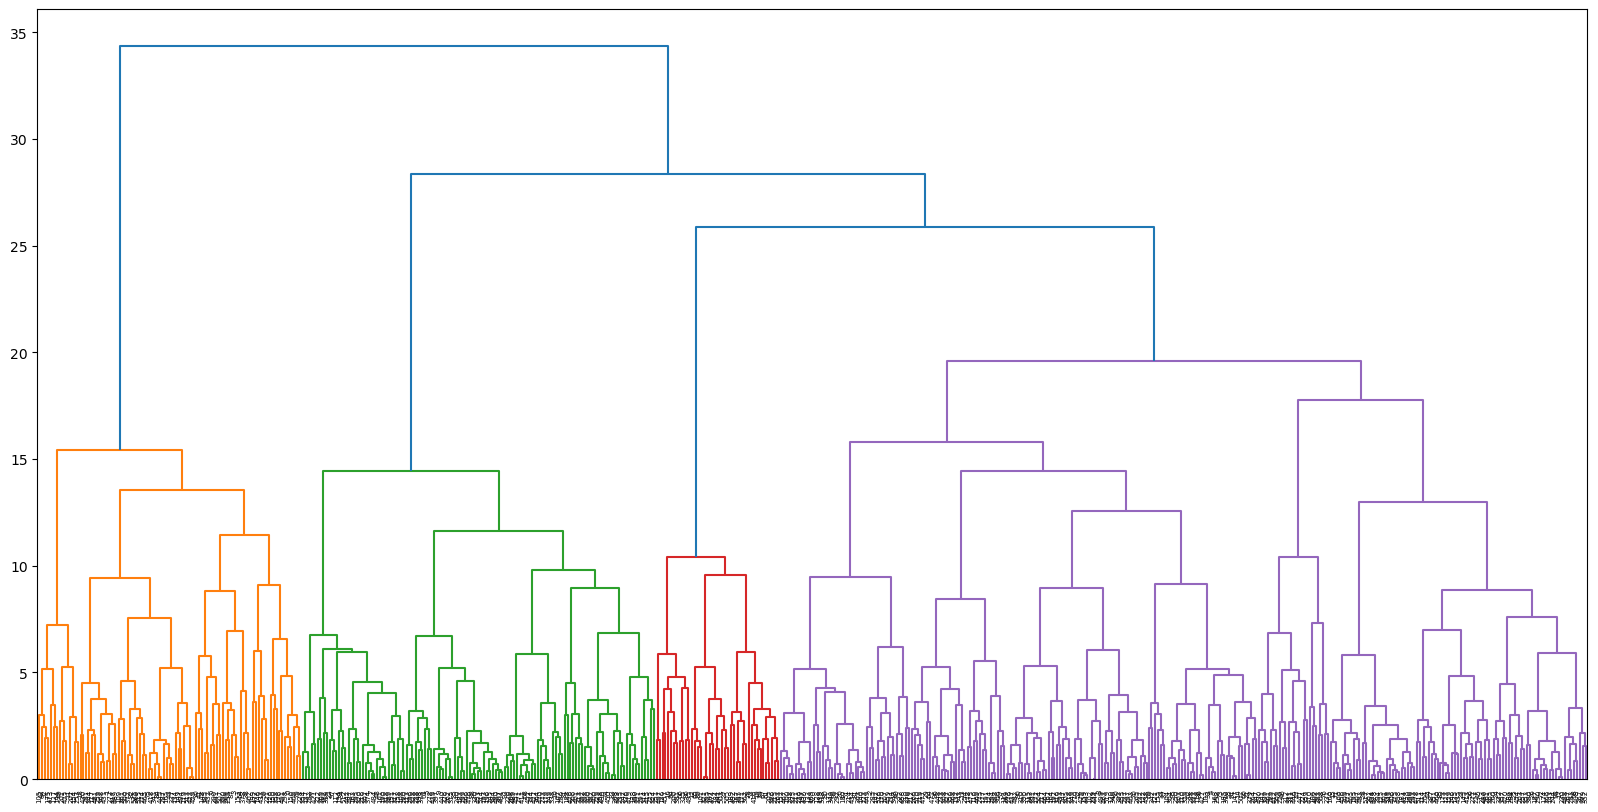

In [31]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

In [32]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(data_scaled)
    labels = agg.labels_
    score = silhouette_score(data_scaled, labels)
    silhouette.append(score)

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 51.46it/s]


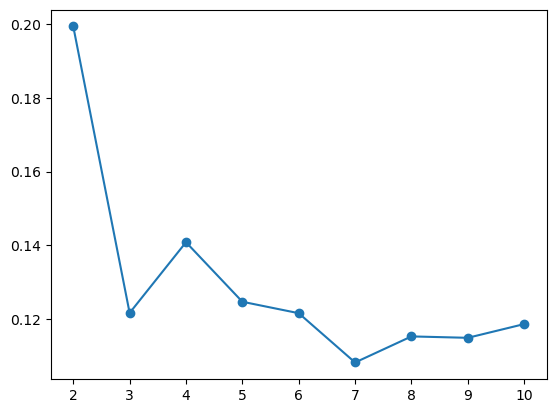

In [33]:
plt.plot(range(2,11), silhouette, marker='o');

In [34]:
agg = AgglomerativeClustering(n_clusters=4).fit(data_scaled)
data_agg = data.copy()
data_agg['Cluster'] = agg.labels_
data_agg.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,labels,Cluster
1,22,0.0,2,1.0,0.0,1.0,5951,48,5.0,2,1
3,45,1.0,2,0.0,0.0,0.0,7882,42,4.0,2,1
4,53,1.0,2,0.0,0.0,0.0,4870,24,1.0,2,0
7,35,1.0,3,2.0,0.0,1.0,6948,36,1.0,2,1
9,28,1.0,3,1.0,0.0,1.0,5234,30,1.0,2,0


In [35]:
labels = agg.labels_
plot_data = pd.DataFrame(zip(tsne_transformed[:,0], tsne_transformed[:,1], labels), columns=['x', 'y', 'hue'])

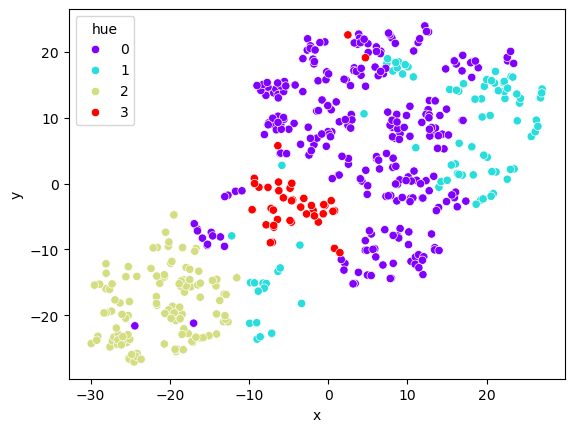

In [36]:
sns.scatterplot(plot_data, x='x', y='y', hue='hue', palette='rainbow');

In [37]:
data['labels'] = labels

In [38]:
data['labels'].value_counts(normalize=True)

0    0.521073
2    0.227969
1    0.170498
3    0.080460
Name: labels, dtype: float64

"0 кластер" - 52%, "1 кластер " - 23%, "2 кластер" - 17%, "3 кластер" - 8%, кластеры не имеют четких границ, много выбросов

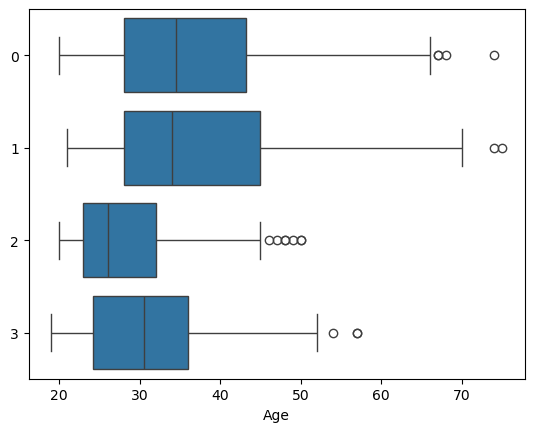

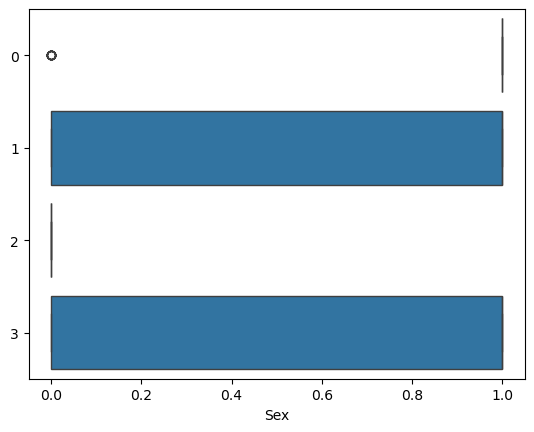

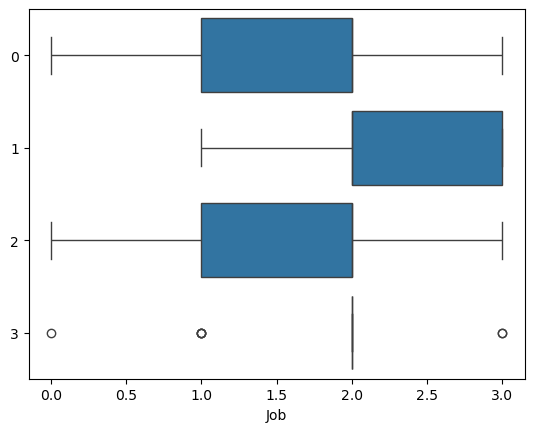

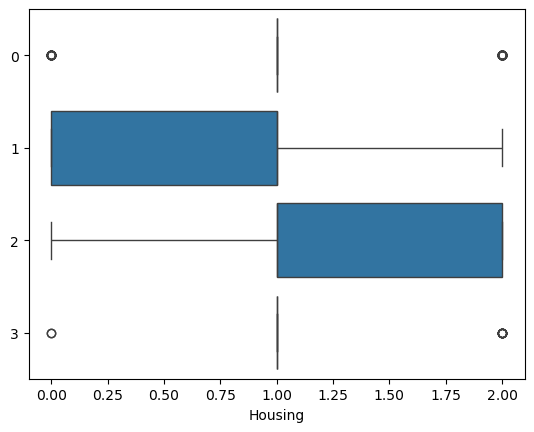

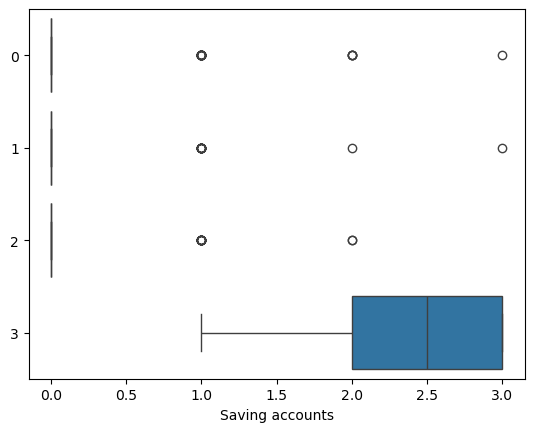

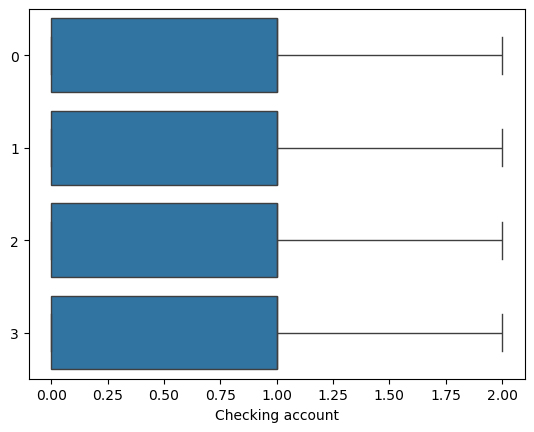

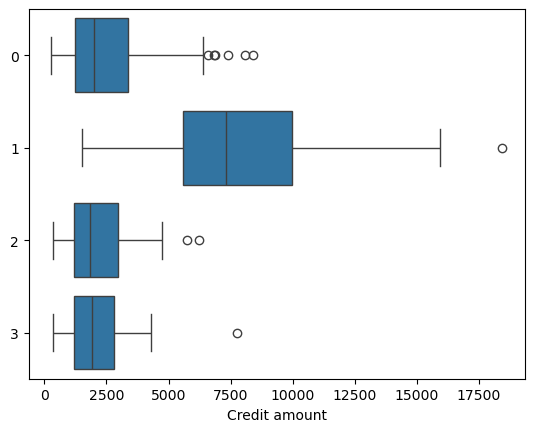

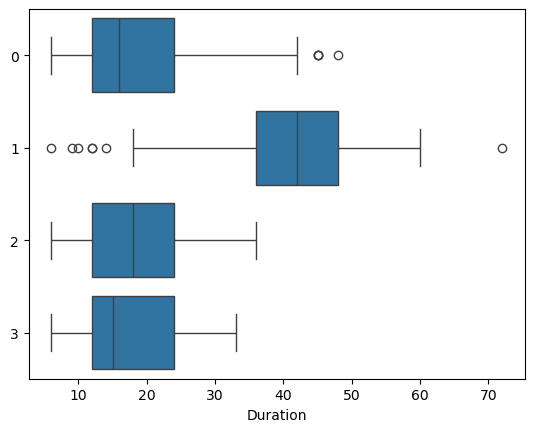

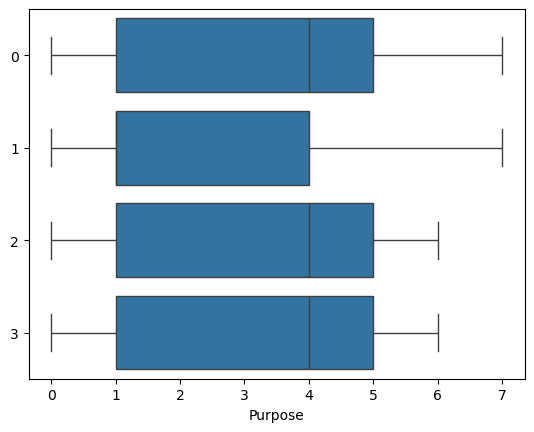

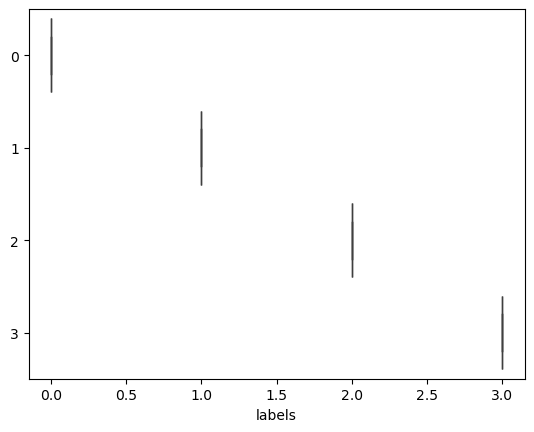

In [39]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.show();

#### Статистика

In [40]:
data.groupby('labels').median().T.round(2)

labels,0,1,2,3
Age,34.5,34.0,26.0,30.5
Sex,1.0,1.0,0.0,1.0
Job,2.0,2.0,2.0,2.0
Housing,1.0,1.0,1.0,1.0
Saving accounts,0.0,0.0,0.0,2.5
Checking account,1.0,1.0,1.0,1.0
Credit amount,1991.0,7297.0,1842.0,1927.0
Duration,16.0,42.0,18.0,15.0
Purpose,4.0,1.0,4.0,4.0


## 2.2.3. DBSCAN

#### Строим силуэтный коэффициент

In [41]:
silhouette = []
clusters = []
eps_range = np.arange(1,4,0.5)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(data_scaled)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(data_scaled, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 26.10it/s]


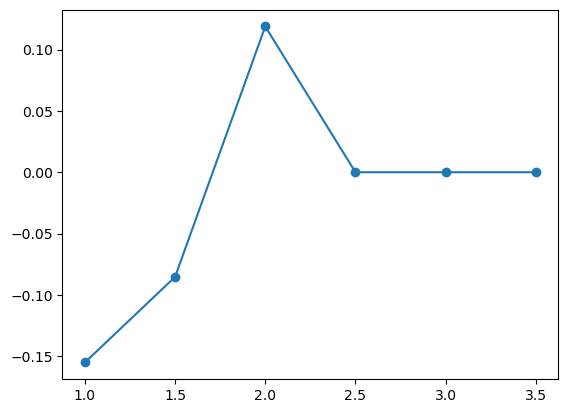

In [42]:
plt.plot(eps_range, silhouette, marker='o')

На графике: по оси Х - eps, по оси Y - силуэтный коээфициент, максимум которого достигается при eps равном от 1,8 до 2,1.

#### Строим диаграмму кластеров

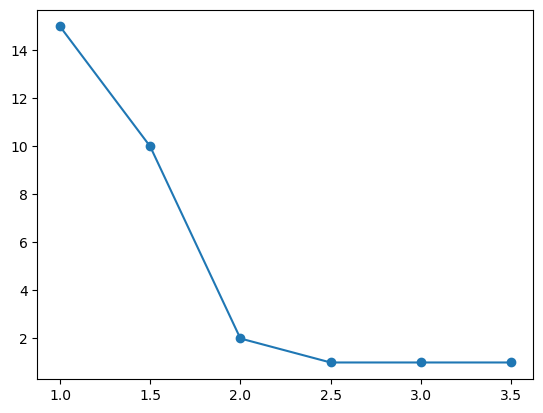

In [43]:
plt.plot(eps_range, clusters, marker='o')

На графике: по оси Х - eps, по оси Y- количество кластеров. Из диаграммы видно, что при eps=2.0, число кластеров =2.

#### Построим на одном графике два предудущих графика

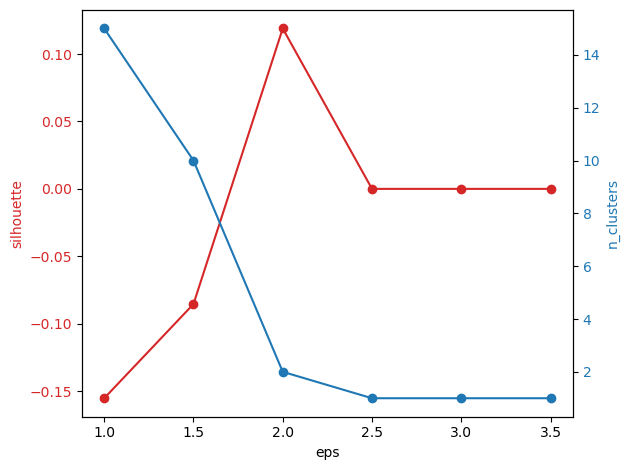

In [44]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(eps_range, silhouette, marker='o', color=color)
ax1.set_xlabel('eps')
ax1.set_ylabel('silhouette', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # создаем вторую ось

color = 'tab:blue'
ax2.plot(eps_range, clusters, marker='o', color=color)
ax2.set_ylabel('n_clusters', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # чтобы правую y-label не обрезало
plt.show()

#### Рассмотрим промежуток eps от 1,8  до 2,1 более подробно

In [45]:
def dbscan_clustering(eps_range, data_scaled):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(data_scaled)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(data_scaled, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

100%|██████████████████████████████████████████| 70/70 [00:02<00:00, 24.35it/s]


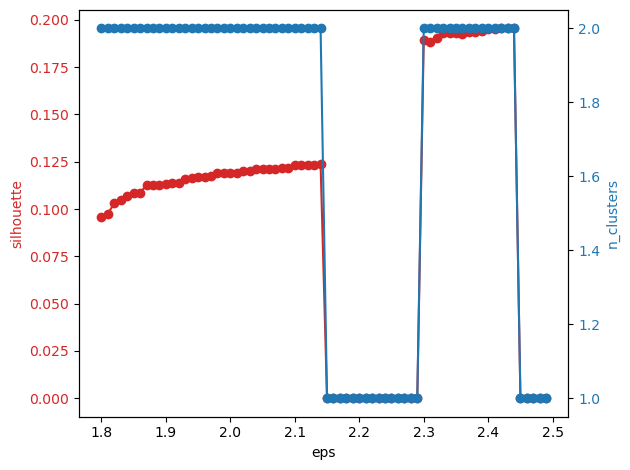

In [46]:
eps_range = np.arange(1.8,2.5,0.01)
dbscan_clustering(eps_range, data_scaled)

Из графика видно, что максимум силуэтного коэффициента наблюдается при eps равным  2 или 2.45. 

Визуализируем DBSCAN с помощью t-sne и проверим как все строится

In [47]:
dbscan = DBSCAN(eps=2).fit(data_scaled)
labels = dbscan.labels_
data_dbscan = data.copy()
data_dbscan['Cluster'] = dbscan.labels_
data_dbscan.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,labels,Cluster
1,22,0.0,2,1.0,0.0,1.0,5951,48,5.0,1,0
3,45,1.0,2,0.0,0.0,0.0,7882,42,4.0,1,1
4,53,1.0,2,0.0,0.0,0.0,4870,24,1.0,0,1
7,35,1.0,3,2.0,0.0,1.0,6948,36,1.0,1,1
9,28,1.0,3,1.0,0.0,1.0,5234,30,1.0,0,1


In [48]:
plot_data = pd.DataFrame(zip(tsne_transformed[:,0], tsne_transformed[:,1], labels), columns=['x', 'y', 'hue'])

<Axes: xlabel='x', ylabel='y'>

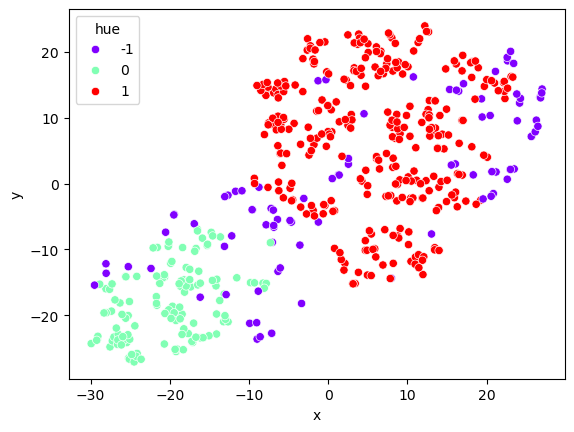

In [49]:
sns.scatterplot(plot_data, x='x', y='y', hue='hue', palette='rainbow')

На рисунке мы видим вместо 2-х кластеров, маркеры 3-х кластеров, причем кластер "-1" представляет собой выбросы.

In [50]:
data['labels'] = labels

In [51]:
data['labels'].value_counts(normalize=True)

 1    0.588123
 0    0.239464
-1    0.172414
Name: labels, dtype: float64

"0 кластер" - 24%, "1 кластер " - 59%, "-1 кластер" - 17%, кластеры не имеют четких границ, много выбросов

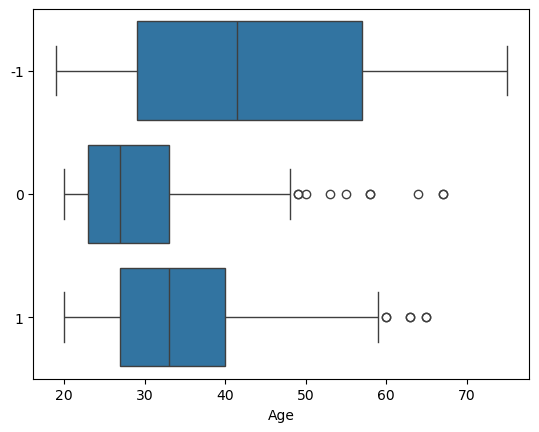

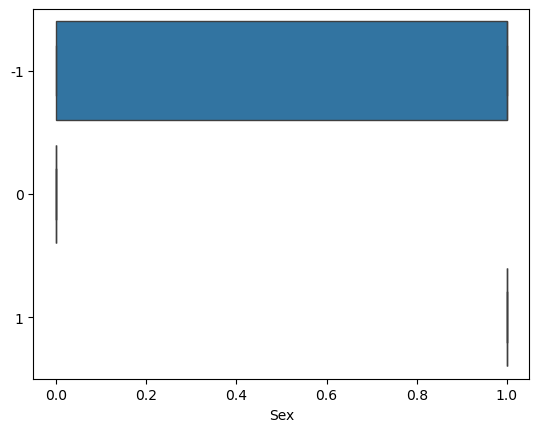

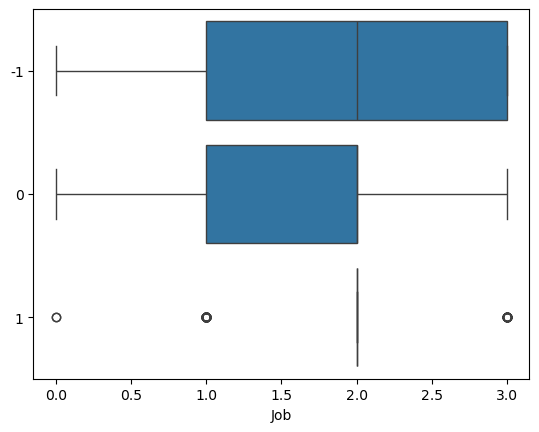

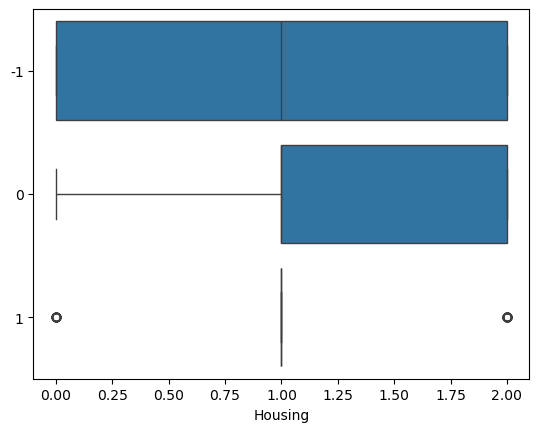

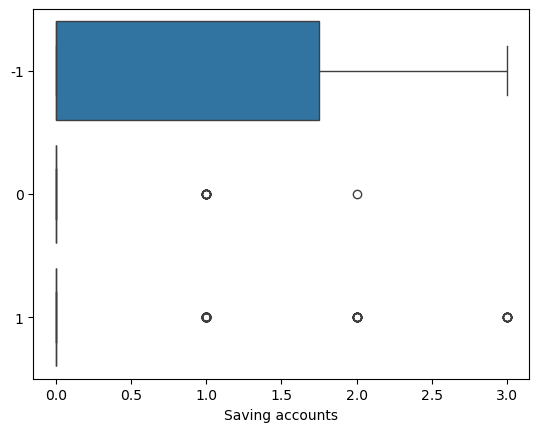

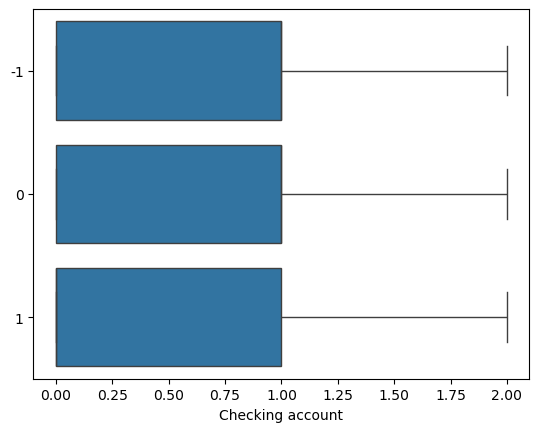

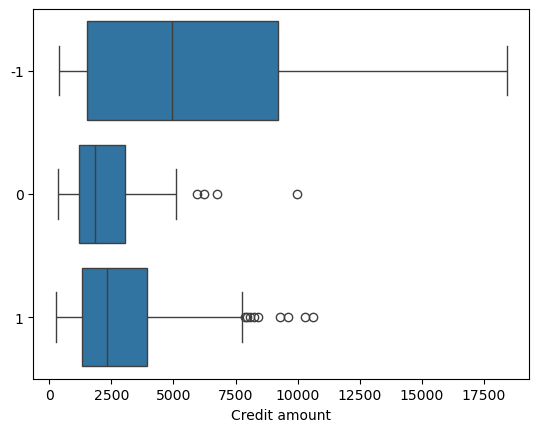

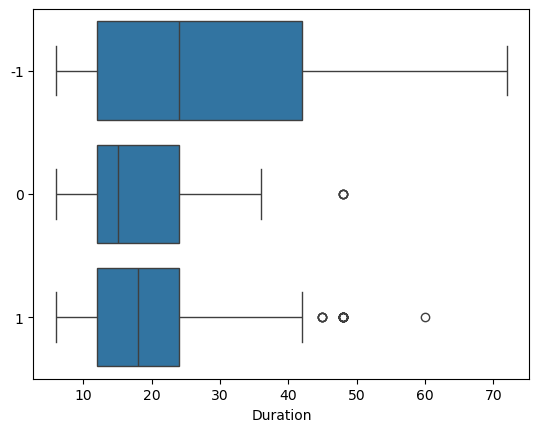

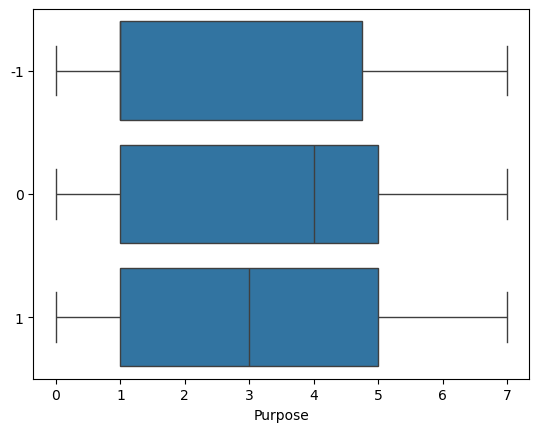

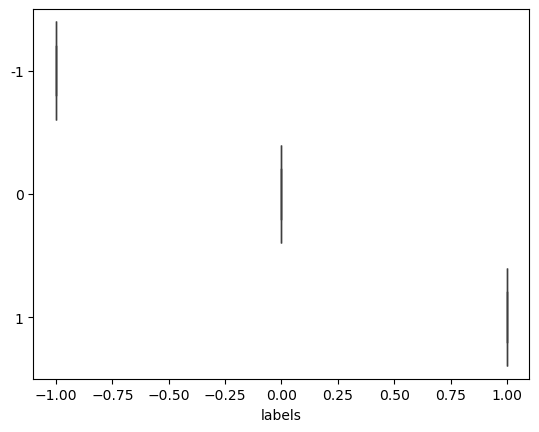

In [52]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.show();

#### Посмотрим статистику

In [53]:
data.groupby('labels').median().T.round(2)

labels,-1,0,1
Age,41.5,27.0,33.0
Sex,1.0,0.0,1.0
Job,2.0,2.0,2.0
Housing,1.0,1.0,1.0
Saving accounts,0.0,0.0,0.0
Checking account,1.0,1.0,0.0
Credit amount,4962.5,1845.0,2326.0
Duration,24.0,15.0,18.0
Purpose,1.0,4.0,3.0


#  4.3. Выводы и интерпретация результатов исследований

### Анализ среднего значения в кластерах
был проведен выше для всех методов

### Визуализация кластеров

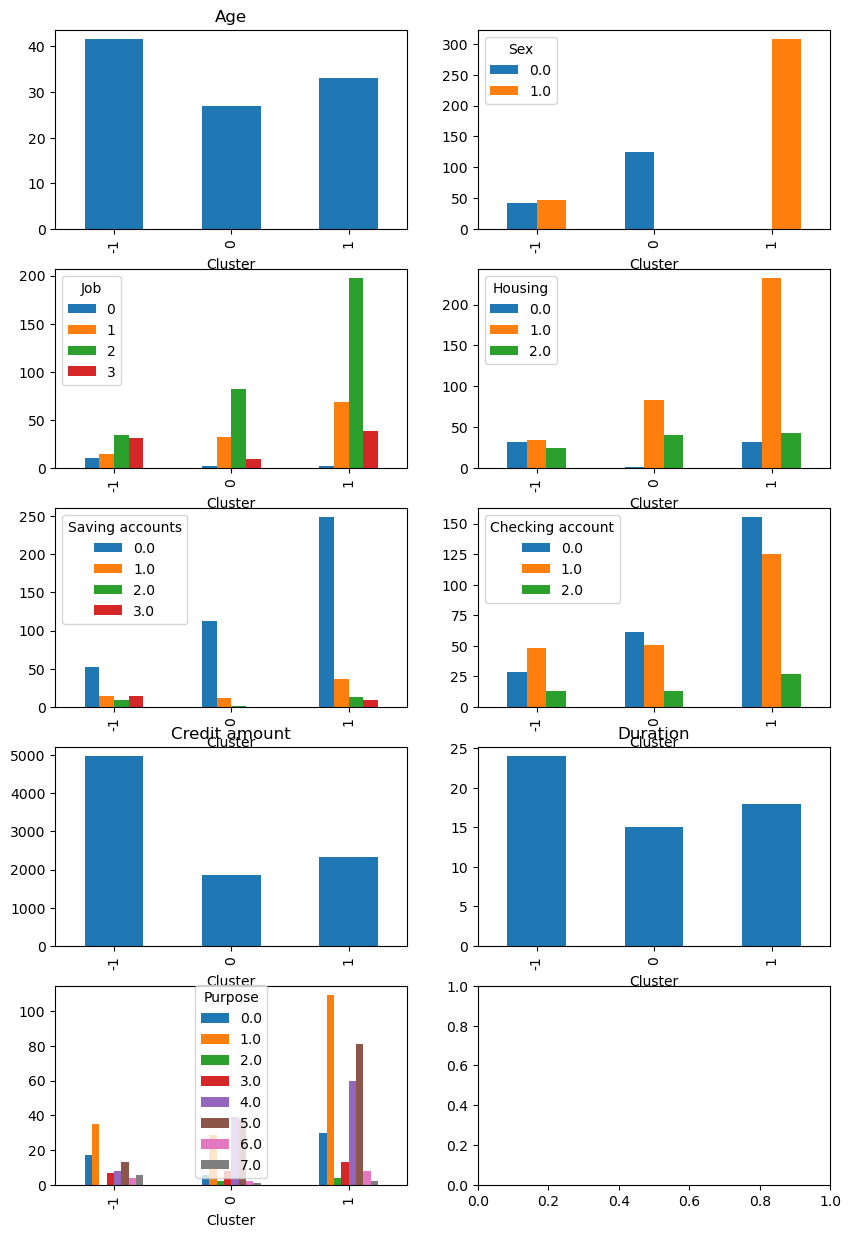

In [54]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
data_dbscan.groupby(['Cluster']).median()['Age'].plot(kind='bar', ax=axs[0, 0])
data_dbscan.groupby(['Cluster', 'Sex']).size().unstack().plot(kind='bar', ax=axs[0, 1])
data_dbscan.groupby(['Cluster', 'Job']).size().unstack().plot(kind='bar', ax=axs[1, 0])
data_dbscan.groupby(['Cluster', 'Housing']).size().unstack().plot(kind='bar', ax=axs[1, 1])
data_dbscan.groupby(['Cluster', 'Saving accounts']).size().unstack().plot(kind='bar', ax=axs[2, 0])
data_dbscan.groupby(['Cluster', 'Checking account']).size().unstack().plot(kind='bar', ax=axs[2, 1])
data_dbscan.groupby(['Cluster']).median()['Credit amount'].plot(kind='bar', ax=axs[3, 0])
data_dbscan.groupby(['Cluster']).median()['Duration'].plot(kind='bar', ax=axs[3, 1])
data_dbscan.groupby(['Cluster', 'Purpose']).size().unstack().plot(kind='bar', ax=axs[4, 0])

axs[0, 0].set_title('Age')
axs[3, 0].set_title('Credit amount')
axs[3, 1].set_title('Duration')

plt.show()

При использовании нормализации StandardScaler K-means, Hierarhical и DBSCAN показали разную статистику. DBSCAN показал 2 кластера по силуэтному коэффициенту, но при построении диаграммы показал 3 кластера, причем один из кластеров "-1". 

# Выводы по нормализации

1. В своей работе я использовала 3 разных метода нормализации: MinMaxScaler, StandardScaler, RobustScaler. 
MinMaxScaler показал худшие результаты с точки зрения приведения к одному масштбау, по сравнению с другими методами. Но с точки зрения кластеризации он показал себя лучше других методов: выявил два четко сгруппированных кластера, без выбросов для всех используемых методов. В то время как StandardScaler и RobustScaler показали от 2-х до 4-х (в зависимости от используемого метода) нечетких кластеров с выбросами.  
2. Если анализировать сами кластеры, то мы видим, что "женский" кластер, так и остался выделенным в отдельный кластер", а "мужской" кластер был разделен на 2/3 дополнительных кластера.
В этой работе применение MinMaxScaler показало себя хорошо, позволило выделить 2 четких кластера без выбросов для всех методов и сделать соответсвующие выводы о недополученной прибыли из-за малоэффективной работы с "женским" кластером.